*Supporting textbook chapters for week 1: 2, 3 and 4.3*

This is an example of "lecture notes".
As you will quickly find out, this course is by nature a lab course.
Therefore, my "lecture notes" will not often follow the linear progression of regular lecture notes.
This is particularly true for this first lecture, in which I merely want to give you pointers to do the first lab.

# Pseudocode


## General principles

The concept of "Pseudocode" is loosely defined, see for example https://en.wikipedia.org/wiki/Pseudocode.
Python is actually seen as pseudocode by some people.

In this lecture, I will use a **very** loose definition for it, i.e., mostly plain English with bullet points.
You are free to use your own (and probably better) version.
Make sure that it is understandable by someone who speaks English and is familiar with the problem you would be trying to solve, though not familiar with Python.

* Pseudocode is the planned version of your code, written in plain English ($\neq$ programming language).
* You should write one before starting any code.
* It should describe your algorithm.
* It helps ensure that your planned logic for the algorithm is sound.

* Real text or comments for your real code in the end.
* **Keep a copy of it intact** so you can refer to it when you are coding.
* Coding = turning your pseudocode $\to$ specific programming language. You should be able to take your pseudocode and convert it into any typical programming language.

* Pseudocode: somewhat personal. You do you.
* Concise, logical, step-by-step.
* Start with **brief** overview of what this piece of code will do. 

Examples for sequential stuff:
* Input: `READ`, `OBTAIN`, `GET`
* Initialize: `SET`, `DEFINE`
* Compute: `COMPUTE`, `CALCULATE`, `DETERMINE`
* Add one: `INCREMENT`, `BUMP`
* Output: `PRINT`, `DISPLAY`, `PLOT`, `WRITE`

Examples for conditions and loops:
* `WHILE`, `IF-THEN-ELSE`, `REPEAT-UNTIL`, `CASE`, `FOR`

Should also include calling functions:
* `CALL`

## Pseudo-code, example 1

Convert polar to Cartesian coordinates from keyboard input:

$r$, $\theta$ ($^\circ$) $\to$ $x$, $y$.

Let's try, in code comments form:

In [ ]:
# Read radius r from keyboard
# Read angle theta in degs from keyboard input
# convert degrees into radians
# Compute x, y = r*(cos(theta), sin(theta))
# print the result to screen

In [1]:
# Read radius from keyboard input
# Read angle in degrees from keyboard input
# Convert angle in radians
# compute x and y from r an theta
# Print the result to screen


Alternative: typeset the pseudocode in your report.

In [2]:
import numpy as np  # import numpy

In [3]:
# From keyboard, read the radius and save.
r = float(input("Enter r: "))

Enter r: 13


In [4]:
# From keyboard, read the angle in degrees and save.
theta = float(input("Enter theta in degs: "))

Enter theta in degs: 45


In [7]:
# Do the conversion from degrees to radians
theta_r = theta/180*np.pi

In [8]:
# Compute $(x, y) = r(\cos\theta_r, \sin\theta_r)$.
x, y = r*np.cos(theta_r), r*np.sin(theta_r) 

In [10]:
# Print result (x, y) to screen.
print("x = {0:.4f}, y = {1:.2e}".format(x, y))

x = 9.1924, y = 9.19e+00


## Pseudo-code, example 2

* Number of radioactive atoms of uranium $N$ as a function of time given initial $N_0$ and
$$\frac{dN}{dt} = -\frac{N}{\tau}.$$
($\tau =$ decay constant)
* Use Euler method for integration.
* Integrate for $5\tau$.

In [11]:
# Pseudocode:
# Define decay constant tau, initial N0 and duration 5tau
# Initialize time and time array, as well as N(t) array
# Compute dt
# FOR 100 iterations:
#     Increment the N array from the previous values according to Euler
# Plot N vs. t

In [12]:
""" Code that computes the number of radioactive atoms of uranium N
as fct of time, given tau and N0 and using Euler method.
Author: Nicolas Grisouard, Pythonisto extraordinaire, Sept. 2021 """

# Re-import, in case I am executing cells in random order
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# I skipped this cell in class: it is a conversion of the 
# half-life of U238 (which is easily found on Wikipedia)
# and the decay rate (which for some reason is not)
print("{0:1.3e}".format(4.468e9/np.log(2.)))

In [13]:
# 1. Define decay constant tau, initial N0, and end time 5*tau
tau = 6.446e9  # [s] tau for U238
N0 = 1e6  # [1] initial N
t_end = 5*tau  # [s] the end of the simulation time

In [24]:
# 2. Initialize time array with 101 values
time = np.linspace(0., t_end, 1001)

# 3. Compute dt the time step because we'll need it
dt = time[1] - time[0]

# 4. Initialize a number array with same number of elements
N = 0*time
N[0] = N0

In [25]:
# 5. FOR 101 iterations:
#        Increment the N array with Euler: N[i+1] = N[i] - dt*N[i]/tau
for ii in range(len(time)-1):
    N[ii+1] = N[ii] - dt*N[ii]/tau

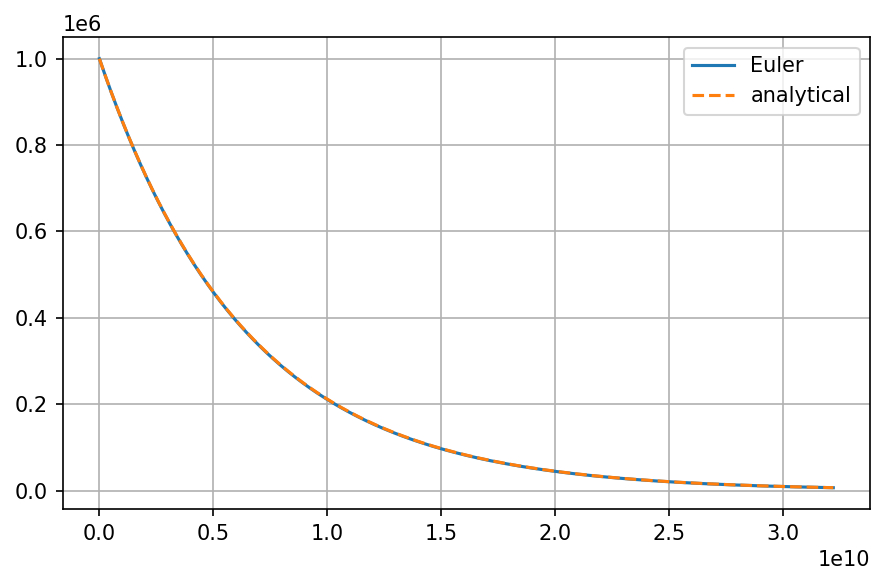

In [26]:
# 6. Plot N vs. t
plt.figure(dpi=150)
plt.plot(time, N, label='Euler')
plt.plot(time, N0*np.exp(-time/tau), '--', label='analytical')
plt.grid()
plt.legend()
plt.tight_layout()

# Typical approach for solving a problem

1. Start with math model, often but not always continuous.
2. **Discretize:** set up discrete arrays of independent variables (e.g., $x$, $t$), dependent variables (e.g. $v(t)$, $a(t)$), and define operators on these variables ($dv/dt$, $ma$...).
3. **Initialize** parameters and variables appropriately.
4. **Evalutize:** run algorithm to operate on these variables.
5. **Analyze:** some extra processing of the raw results, figures...

See example: Given position $x(t)$ of a particle undergoing SHO with angular frequecy 0.5 rad/s, initial position 3 m, initial velocity 0 m/s, calculate velocity and acceleration using simple finite difference

In [27]:
# Example to illustrate general procedure for mathematical modeling.
# Given position x(t) of a particle undergoing SHO,
# calculate velocity and acceleration using simple finite difference
import numpy as np  # import numpy
import matplotlib.pyplot as plt  # import figure functions

In [37]:
# 2. Discretize

# Define time grid and dependent variables
omega = 0.5  # [rad/s] angular frequency
A = 3.  # [m] diplacement amplitude
t = np.linspace(0, 30., 301)  # time array: linear space from 0 to 10s, 101 elements
N = len(t)  # number of time steps (length of time array)
x = np.empty(N)  # array of positions (empty array of length N)
v = np.empty(N-1)  # array of velocities (empty array of length N-1)
a = np.empty(N-2)  # array of accelerations (empty array of length N-2)

In [38]:
# 3. Initialize: define signal on discretized grid
x = A*np.cos(omega*t)

In [39]:
# 2. discretize and 4. evalutize (here, apply algorithm)
# Define velocity using finite differences: v = Delta x/Delta t
dt = t[1] - t[0]
for k in range(N-1):
    v[k] = (x[k+1]-x[k])/dt

# Define acceleration using finite differences: a = Delta v/Delta t
for k in range(len(x)-2):
    a[k] = (v[k+1]-v[k])/dt

In [40]:
# 5. Analyze
# print results
print("t is ", t)

t is  [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5


In [41]:
print("x is ", x)

x is  [ 3.          2.99625078  2.9850125   2.96631323  2.94019973  2.90673727
  2.86600947  2.81811814  2.76318298  2.70134131  2.63274769  2.55757357
  2.47600684  2.3882514   2.29452656  2.19506661  2.09012013  1.97994944
  1.8648299   1.74504927  1.62090692  1.49271314  1.36078836  1.22546232
  1.08707326  0.94596709  0.80249649  0.65702006  0.50990143  0.36150831
  0.21221161  0.06238448 -0.08759857 -0.23736267 -0.38653348 -0.53473817
 -0.68160628 -0.82677074 -0.9698687  -1.11054249 -1.24844051 -1.38321807
 -1.51453831 -1.642073   -1.76550335 -1.88452087 -1.99882806 -2.10813923
 -2.21218115 -2.31069376 -2.40343085 -2.49016061 -2.57066626 -2.64474659
 -2.71221643 -2.77290714 -2.82666702 -2.87336171 -2.9128745  -2.94510661
 -2.96997749 -2.98742497 -2.99740545 -2.99989398 -2.99488433 -2.98238903
 -2.96243931 -2.93508504 -2.90039458 -2.85845464 -2.80937006 -2.75326352
 -2.69027525 -2.62056269 -2.5443001  -2.46167807 -2.37290314 -2.27819718
 -2.17779691 -2.07195329 -1.96093086 -1.84500

In [42]:
print("a is ", a) 

a is  [-0.74890665 -0.74609767 -0.74142383 -0.73489681 -0.72653294 -0.71635311
 -0.70438277 -0.69065184 -0.67519464 -0.65804981 -0.6392602  -0.61887276
 -0.59693847 -0.57351214 -0.54865233 -0.52242118 -0.49488425 -0.46611036
 -0.43617144 -0.40514231 -0.37310055 -0.34012622 -0.30630176 -0.2717117
 -0.23644251 -0.20058233 -0.1642208  -0.1274488  -0.09035825 -0.05304185
 -0.01559287  0.02189508  0.0593283   0.09661324  0.13365669  0.17036607
  0.20664963  0.24241667  0.27757779  0.31204511  0.34573248  0.3785557
  0.41043273  0.44128389  0.47103207  0.49960292  0.52692502  0.55293008
  0.5775531   0.60073254  0.62241047  0.64253269  0.66104891  0.67791286
  0.69308237  0.70651955  0.71819079  0.72806692  0.73612327  0.7423397
  0.74670066  0.74919526  0.74981726  0.74856511  0.74544194  0.74045555
  0.7336184   0.72494759  0.7144648   0.70219621  0.68817249  0.67242871
  0.6550042   0.63594252  0.61529132  0.59310221  0.56943065  0.54433581
  0.51788042  0.49013059  0.4611557   0.43102815

In [43]:
# plot results
def plot_da_fig(t, x, v, a, N):
    plt.figure()

    plt.subplot(3, 1, 1)
    plt.plot(t, x)
    plt.ylabel('x')

    plt.subplot(3, 1, 2)
    plt.plot(t[:-1], v)
    plt.ylabel('v')

    plt.subplot(3, 1, 3)
    plt.plot(t[:-2], a)
    plt.ylabel('a')

    plt.tight_layout()
    # plt.savefig('T01.pdf')  # saves a pdf figure on disk

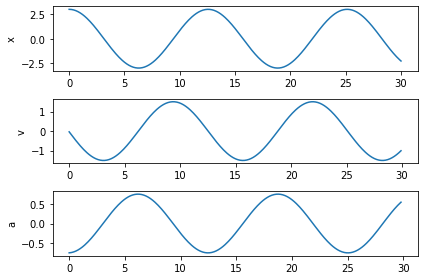

In [44]:
plot_da_fig(t, x, v, a, N)